# Implementing and Evaluating Clustering Algorithms with PCA for Dimensionality Reduction

## 1. Import Libraries and Load the Data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [3]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [5]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**Insights:**
1. The dataset contains 13 numerical columns.
2. There aren't missing values.

## 2. Preprocess the data:

### 2.1 Standardize the data:

In [6]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

### 2.2 Apply PCA to reduce to 2 components:

In [7]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [8]:
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

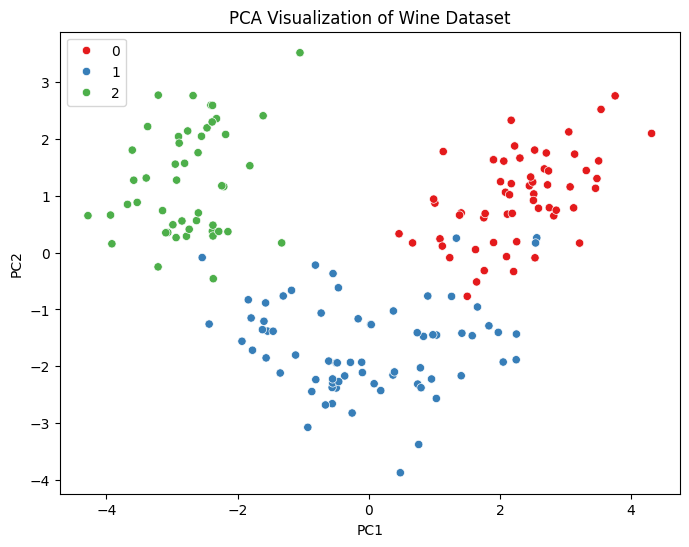

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=data.target, palette='Set1')
plt.title('PCA Visualization of Wine Dataset')
plt.show()

## 3. Clustering:

### 3.1 Train K-means:

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels_original = kmeans.fit_predict(df_scaled)
kmeans_labels_pca = kmeans.fit_predict(df_pca)

### 3.2 Train Hierarchical Clustering:

In [11]:
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels_original = hierarchical.fit_predict(df_scaled)
hierarchical_labels_pca = hierarchical.fit_predict(df_pca)

### 3.3 Evalute Clustering:

In [12]:
def evaluate_clustering(labels, data, name):
    silhouette = silhouette_score(data, labels)
    db_index = davies_bouldin_score(data, labels)
    print(f"{name}: Silhouette Score = {silhouette:.4f}, Davies-Bouldin Index = {db_index:.4f}")

In [13]:
evaluate_clustering(kmeans_labels_original, df_scaled, "K-Means (Original)")
evaluate_clustering(kmeans_labels_pca, df_pca, "K-Means (PCA)")
evaluate_clustering(hierarchical_labels_original, df_scaled, "Hierarchical (Original)")
evaluate_clustering(hierarchical_labels_pca, df_pca, "Hierarchical (PCA)")

K-Means (Original): Silhouette Score = 0.2849, Davies-Bouldin Index = 1.3892
K-Means (PCA): Silhouette Score = 0.5602, Davies-Bouldin Index = 0.5977
Hierarchical (Original): Silhouette Score = 0.2774, Davies-Bouldin Index = 1.4186
Hierarchical (PCA): Silhouette Score = 0.5591, Davies-Bouldin Index = 0.6013


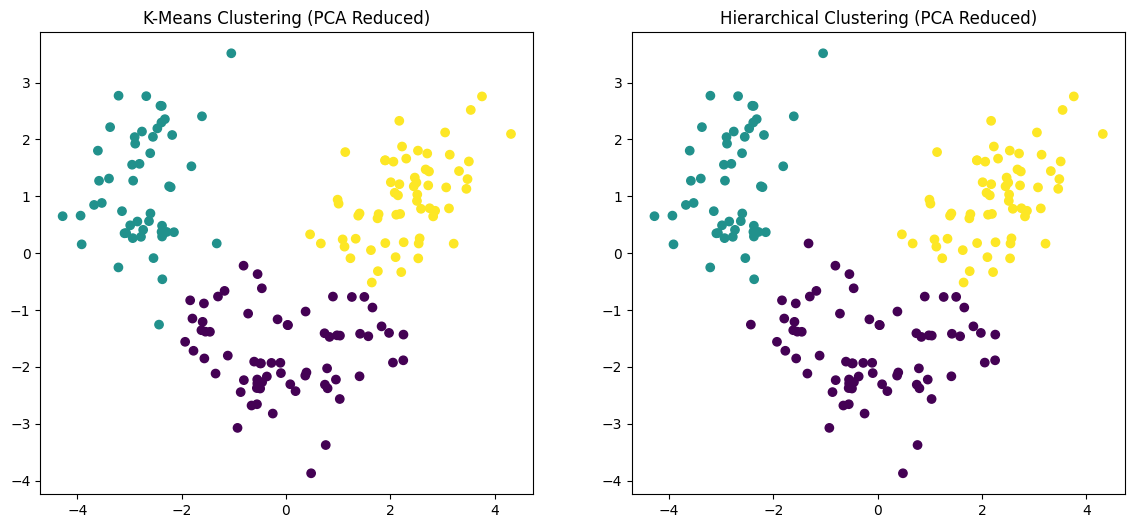

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].scatter(df_pca['PC1'], df_pca['PC2'], c=kmeans_labels_pca, cmap='viridis')
axes[0].set_title('K-Means Clustering (PCA Reduced)')
axes[1].scatter(df_pca['PC1'], df_pca['PC2'], c=hierarchical_labels_pca, cmap='viridis')
axes[1].set_title('Hierarchical Clustering (PCA Reduced)')
plt.show()